Data Cleaning

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases_by_state#covid-19-pandemic-in-united-states-by-location'

In [3]:
df = pd.read_html(url)

In [4]:
df[1]

,Unnamed: 0,Location[i],Cases[ii],Deaths,Recoveries[iii],Hospital[iv],Ref.
0,NaN,56 / 56,98348820,1074700,—,—,NaN
1,NaN,Alabama,1561557,20704,275245,45250,[1]
2,NaN,Alaska,287411,1399,7165,1260,[2]
3,NaN,American Samoa,8250,34,3,—,[3]
4,NaN,Arizona,2365080,31929,—,57072,[4]
5,NaN,Arkansas,978105,12663,306382,14617,[5]
6,NaN,California,11552816,96803,—,—,[6]
7,NaN,Colorado,1719778,13742,—,23293,[7]
8,NaN,Connecticut,938604,11665,—,12257,[8][9]
9,NaN,Delaware,319477,3185,18371,—,[10]


In [5]:
cov_html = df[1]

In [6]:
cov_html.columns

Index(['Unnamed: 0', 'Location[i]', 'Cases[ii]', 'Deaths', 'Recoveries[iii]',
       'Hospital[iv]', 'Ref.'],
      dtype='object')

First = Delete the two unnecessary columns.

In [7]:
cov_html=cov_html.drop(columns=['Unnamed: 0', 'Ref.'])
cov_html

,Location[i],Cases[ii],Deaths,Recoveries[iii],Hospital[iv]
0,56 / 56,98348820,1074700,—,—
1,Alabama,1561557,20704,275245,45250
2,Alaska,287411,1399,7165,1260
3,American Samoa,8250,34,3,—
4,Arizona,2365080,31929,—,57072
5,Arkansas,978105,12663,306382,14617
6,California,11552816,96803,—,—
7,Colorado,1719778,13742,—,23293
8,Connecticut,938604,11665,—,12257
9,Delaware,319477,3185,18371,—


Second = Drop the three unnecessary rows.

In [8]:
cov_html = cov_html.drop(cov_html.index[[0,57,58]])
cov_html

,Location[i],Cases[ii],Deaths,Recoveries[iii],Hospital[iv]
1,Alabama,1561557,20704,275245,45250
2,Alaska,287411,1399,7165,1260
3,American Samoa,8250,34,3,—
4,Arizona,2365080,31929,—,57072
5,Arkansas,978105,12663,306382,14617
6,California,11552816,96803,—,—
7,Colorado,1719778,13742,—,23293
8,Connecticut,938604,11665,—,12257
9,Delaware,319477,3185,18371,—
10,District of Columbia,170750,1403,28532,—


Third = Make column names more readable.

In [9]:
cov_html.rename(columns= {'Location[i]':'Location', 'Cases[ii]':'Cases', 'Recoveries[iii]':'Recoveries',
       'Hospital[iv]':'Hospitalizations'}, inplace=True)

In [10]:
cov_html

,Location,Cases,Deaths,Recoveries,Hospitalizations
1,Alabama,1561557,20704,275245,45250
2,Alaska,287411,1399,7165,1260
3,American Samoa,8250,34,3,—
4,Arizona,2365080,31929,—,57072
5,Arkansas,978105,12663,306382,14617
6,California,11552816,96803,—,—
7,Colorado,1719778,13742,—,23293
8,Connecticut,938604,11665,—,12257
9,Delaware,319477,3185,18371,—
10,District of Columbia,170750,1403,28532,—


In [11]:
cov_html['Recoveries'].isnull().values.any()

False

In [12]:
print(cov_html['Recoveries'].values)

['275245' '7165' '3' '—' '306382' '—' '—' '—' '18371' '28532' '—' '—'
 '7377' '11385' '92573' '—' '1749284' '286309' '—' '47067' '396834'
 '12772' '—' '477796' '2747446' '1447550' '273437' '—' '260525' '142336'
 '—' '70040' '—' '135608' '150100' '2640452' '97286' '29' '2640920'
 '401945' '—' '816884' '—' '—' '—' '107745' '738731' '4,260,877[vi]'
 '2483' '346157' '34184' '—' '—' '119337' '545562' '52688']


Fourth = replace the line symbol in two of the columns with NaN

In [13]:
cov_html = cov_html.replace('—', np.nan)
cov_html = cov_html.replace('4,260,877[vi]', '4260877')
print(cov_html['Recoveries'].values)

['275245' '7165' '3' nan '306382' nan nan nan '18371' '28532' nan nan
 '7377' '11385' '92573' nan '1749284' '286309' nan '47067' '396834'
 '12772' nan '477796' '2747446' '1447550' '273437' nan '260525' '142336'
 nan '70040' nan '135608' '150100' '2640452' '97286' '29' '2640920'
 '401945' nan '816884' nan nan nan '107745' '738731' '4260877' '2483'
 '346157' '34184' nan nan '119337' '545562' '52688']


In [14]:
print(cov_html['Hospitalizations'].values)

['45250' '1260' nan '57072' '14617' nan '23293' '12257' nan nan '78472'
 '55167' nan '2196' '7007' nan '152177' nan '9103' '18768' nan '1511'
 '34577' '19176' nan '63295' '9012' nan '11589' '6048' nan '1095' '63190'
 '12989' '89995' nan '3859' '4' '115481' '23700' '8457' nan nan '8835' nan
 '6548' '18311' nan nan '14520' nan '41373' '19110' nan '25838' '1373']


Fifth = Replace the nan value in the Recoveries column with the average of the column.

I decided to do this because the other columns are not exactly cases-deaths=recoveries. So I think the average may be an alright data point for the states that didn't report enough data.

In [15]:
cov_html["Recoveries"] = pd.to_numeric(cov_html["Recoveries"], downcast="float")
cov_html["Cases"] = pd.to_numeric(cov_html["Cases"], downcast="float")
cov_html["Deaths"] = pd.to_numeric(cov_html["Deaths"], downcast="float")
cov_html["Hospitalizations"] = pd.to_numeric(cov_html["Hospitalizations"], downcast="float")

# converted all the numerical columns to floats for easier use

In [16]:
meanrecov = cov_html['Recoveries'].mean()

In [17]:
cov_html['Recoveries'].fillna(value=meanrecov, inplace=True)
cov_html

,Location,Cases,Deaths,Recoveries,Hospitalizations
1,Alabama,1561557.0,20704.0,275245.0,45250.0
2,Alaska,287411.0,1399.0,7165.0,1260.0
3,American Samoa,8250.0,34.0,3.0,NaN
4,Arizona,2365080.0,31929.0,572353.0,57072.0
5,Arkansas,978105.0,12663.0,306382.0,14617.0
6,California,11552816.0,96803.0,572353.0,NaN
7,Colorado,1719778.0,13742.0,572353.0,23293.0
8,Connecticut,938604.0,11665.0,572353.0,12257.0
9,Delaware,319477.0,3185.0,18371.0,NaN
10,District of Columbia,170750.0,1403.0,28532.0,NaN


Sixth = Upon further inspection, my above method isn't going to work for Rhode Island. It doesn't make sense to have more recoveries than cases. There is no good method to change this based off other states' reporting, as they are all over with their reporting. In this case I think a quick cases-deaths will be sufficient.

In [18]:
print(406546-3674)

402872


In [19]:
cov_html.at[44, 'Recoveries']=402872
cov_html

,Location,Cases,Deaths,Recoveries,Hospitalizations
1,Alabama,1561557.0,20704.0,275245.0,45250.0
2,Alaska,287411.0,1399.0,7165.0,1260.0
3,American Samoa,8250.0,34.0,3.0,NaN
4,Arizona,2365080.0,31929.0,572353.0,57072.0
5,Arkansas,978105.0,12663.0,306382.0,14617.0
6,California,11552816.0,96803.0,572353.0,NaN
7,Colorado,1719778.0,13742.0,572353.0,23293.0
8,Connecticut,938604.0,11665.0,572353.0,12257.0
9,Delaware,319477.0,3185.0,18371.0,NaN
10,District of Columbia,170750.0,1403.0,28532.0,NaN


<AxesSubplot:>

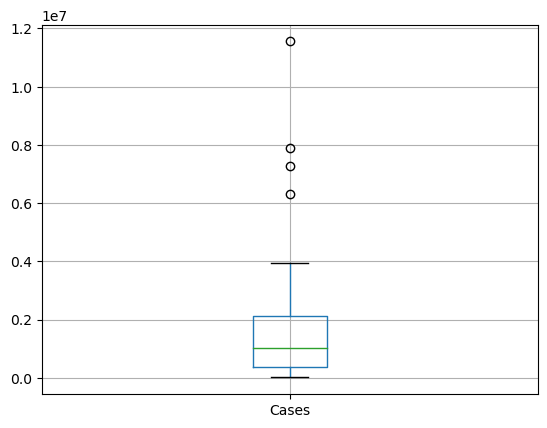

In [20]:
states = pd.DataFrame(data = cov_html, columns = ['Location', 'Cases'])
states.boxplot()

The data for this project milestone comes from a Wikipedia table. I first had to have pandas read the url and extract all the tables from the webpage. Then I had to figure out what the table I wanted was indexed at. Initially my table was extremely unreadable and/or had poor formatting. I had to drop a couple of columns and rows as they were deemed unnecessary for the project. This should not have any ethical implications as they contained filler data useful for a webpage but not a python project. The first major transformation I needed was to convert a symbol value in the table to NaN in order to make it more useable/understandable. Next, I needed to make the column names as well as one of the row values easier to use because they still contained extra symbols from the quick-links in the website. The Recoveries column initially had a lot of missing values. I decided to fill them with the average of the column. I felt this would be a somewhat realistic value after comparing the case numbers and death numbers. Some states will have underreporting and some with have overreporting with this method, but I do not think this will have drastic ethical implications as long as the value is under the number of total cases minus the total deaths reported. Because of this, I had to change the Rhode Island value to its reported cases minus reported deaths to find the number of recoveries as the mean value for the column would be too high. I do have my reservations about this because it could be severe over representation of the real value, but, at present, I do not have a better method. I left the Hospitalizations column alone because I did not feel there was an ethical way to fill in the NaN values without finding another dataset. I did use a boxplot to look for some outliers in the number of cases reported at the end. I haven’t decided what to do with the few outliers on the boxplot because I do not necessarily think they are miss reported. Some states may have had better reporting when this table was compiled. I believe it would be ethically wrong to try to change the values. 